# Set Up

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

from datetime import datetime
from tqdm import tqdm_notebook as tqdm

In [2]:
LST_CITY = [
    "Bandung",
    "Tasikmalaya",
    "Bogor"
]

In [3]:
dct_alert  = {city: pd.read_csv("../data/raw/aggregate_alerts_Kota {}.csv".format(city)) for city in LST_CITY}
dct_irregularities = {city: pd.read_csv("../data/raw/aggregate_median_irregularities_Kota {}.csv".format(city)) for city in LST_CITY}
dct_jams = {city: pd.read_csv("../data/raw/aggregate_median_jams_Kota {}.csv".format(city), index_col=0) for city in LST_CITY if city == "Bogor" }

In [23]:
dct_alert['Bogor']

,id,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,type,avg_location,total_records,date
0,5930177,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),ROAD_CLOSED,"[106.80051600000002, -6.561997000000004]",61,2022-07-06
1,5930178,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,NaN,WEATHERHAZARD,"[106.80159300000008, -6.555780000000009]",61,2022-07-06
2,5930179,2022-07-06 01:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),ROAD_CLOSED,"[106.80051600000002, -6.561997000000004]",60,2022-07-06
3,5930180,2022-07-06 01:00:00.000,32.71,KOTA BOGOR,NaN,WEATHERHAZARD,"[106.80159300000008, -6.555780000000009]",60,2022-07-06
4,5930181,2022-07-06 02:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),ROAD_CLOSED,"[106.80051600000002, -6.561997000000004]",60,2022-07-06
...,...,...,...,...,...,...,...,...,...
9757,6215840,2022-09-04 22:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),ROAD_CLOSED,"[106.80051600000002, -6.561997000000004]",60,2022-09-04
9758,6215841,2022-09-04 22:00:00.000,32.71,KOTA BOGOR,Semplak Raya,JAM,"[106.761214, -6.5526919999999995]",21,2022-09-04
9759,6215842,2022-09-04 23:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),ROAD_CLOSED,"[106.80051600000002, -6.561997000000004]",60,2022-09-04
9760,6220240,2022-09-06 00:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),ROAD_CLOSED,"[106.80051600000002, -6.561997000000004]",60,2022-09-06


In [24]:
dct_irregularities['Bogor']

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,cause_type,median_seconds,median_speed,date,median_jam_level,id,geometry
0,2022-07-06 09:00:00.000,32.71,KOTA BOGOR,N9 Jalan Raya Dramaga,4,1878.0,689.0,13.775000,18,NaN,856.5,7.340,2022-07-06,4.0,1492793,"MULTILINESTRING ((106.738284 -6.568848, 106.73..."
1,2022-07-06 09:00:00.000,32.71,KOTA BOGOR,N9 Jalan Raya Dramaga,3,1226.0,339.5,14.400000,6,NaN,447.0,9.995,2022-07-06,3.0,1492792,"MULTILINESTRING ((106.73546 -6.565547, 106.735..."
2,2022-07-06 10:00:00.000,32.71,KOTA BOGOR,Kapten Yusuf,3,1399.0,517.0,18.150000,2,NaN,707.0,7.110,2022-07-06,3.0,1492794,"LINESTRING (106.785538 -6.61574, 106.785797 -6..."
3,2022-07-06 10:00:00.000,32.71,KOTA BOGOR,N9 Underpass KH Soleh Iskandar,4,627.0,525.0,23.900002,20,NaN,573.5,3.930,2022-07-06,4.0,1492797,"MULTILINESTRING ((106.800519 -6.562005, 106.80..."
4,2022-07-06 10:00:00.000,32.71,KOTA BOGOR,N9 Jalan Raya Dramaga,4,1420.0,623.0,11.710000,19,NaN,734.0,6.560,2022-07-06,4.0,1492796,"MULTILINESTRING ((106.739572 -6.570715, 106.73..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,2022-09-04 19:00:00.000,32.71,KOTA BOGOR,N9 Jalan Raya Ciawi,4,796.0,1878.0,12.700000,6,NaN,1967.0,1.450,2022-09-04,4.0,1583280,"MULTILINESTRING ((106.847295 -6.65567, 106.847..."
4047,2022-09-04 19:00:00.000,32.71,KOTA BOGOR,N9 Jalan Raya Dramaga,4,1418.0,835.0,9.400000,1,NaN,966.0,5.280,2022-09-04,4.0,1583281,"LINESTRING (106.737974 -6.568384, 106.737162 -..."
4048,2022-09-04 19:00:00.000,32.71,KOTA BOGOR,Kapten Yusuf,3,1784.0,725.0,12.330000,23,NaN,980.0,6.550,2022-09-04,3.0,1583277,"MULTILINESTRING ((106.783669 -6.618487, 106.78..."
4049,2022-09-04 20:00:00.000,32.71,KOTA BOGOR,N9 Jalan Raya Dramaga,4,1289.0,892.0,8.440000,5,NaN,1010.0,4.590,2022-09-04,4.0,1583285,"MULTILINESTRING ((106.739572 -6.570715, 106.73..."


In [25]:
dct_jams['Bogor']

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,Pahlawan,2,784.0,62.0,20.310001,4,33469021,2022-07-06,2.0,"MULTILINESTRING ((106.797269 -6.608899, 106.79..."
1,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,Tol Lingkar Luar Bogor,2,1314.0,63.0,37.710000,2,33469023,2022-07-06,2.0,"LINESTRING (106.787027 -6.559782, 106.787701 -..."
2,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),5,167.0,-1.0,0.000000,61,33469019,2022-07-06,5.0,"MULTILINESTRING ((106.800516 -6.561997, 106.80..."
3,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,N8 Jalan Raya Sukabumi,3,379.0,117.5,8.594999,10,33469020,2022-07-06,3.0,"MULTILINESTRING ((106.845486 -6.6594, 106.8454..."
4,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,Tol Lingkar Luar Bogor,1,2438.0,87.0,42.270000,2,33469022,2022-07-06,1.0,"LINESTRING (106.787027 -6.559782, 106.787701 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22953,2022-09-06 00:00:00.000,32.71,KOTA BOGOR,Tol Jagorawi,2,3377.0,116.0,39.030000,1,37279200,2022-09-06,2.0,"LINESTRING (106.831594 -6.604101, 106.831608 -..."
22954,2022-09-06 00:00:00.000,32.71,KOTA BOGOR,N9 Jalan Raya Tajur,1,2625.0,107.5,29.235000,2,37279197,2022-09-06,1.0,"LINESTRING (106.83008 -6.637004, 106.831101 -6..."
22955,2022-09-06 00:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),5,167.0,-1.0,0.000000,60,37279195,2022-09-06,5.0,"MULTILINESTRING ((106.800516 -6.561997, 106.80..."
22956,2022-09-06 00:00:00.000,32.71,KOTA BOGOR,N9 Jalan Raya Pajajaran,2,862.5,77.5,21.035000,4,37279196,2022-09-06,2.0,"MULTILINESTRING ((106.807007 -6.579145, 106.80..."


In [5]:
city = "Bogor"

df_alert = dct_alert[city]
df_irregularities = dct_irregularities[city]
df_jam = dct_jams[city]


# EDA on Alert Dataset

In [65]:
print(df_alert.shape)
print(df_alert.dtypes)

(8827, 9)
id                             int64
time                          object
kemendagri_kabupaten_kode    float64
kemendagri_kabupaten_nama     object
street                        object
type                          object
avg_location                  object
total_records                  int64
date                          object
dtype: object


In [9]:
(df_alert.isna().sum()/df_alert.shape[0]) * 100

id                           0.000000
time                         0.000000
kemendagri_kabupaten_kode    0.000000
kemendagri_kabupaten_nama    0.000000
street                       9.577955
type                         0.000000
avg_location                 0.000000
total_records                0.000000
date                         0.000000
dtype: float64

In [10]:
df_alert.dropna(inplace=True)
df_alert

,id,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,type,avg_location,total_records,date
0,5930177,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),ROAD_CLOSED,"[106.80051600000002, -6.561997000000004]",61,2022-07-06
2,5930179,2022-07-06 01:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),ROAD_CLOSED,"[106.80051600000002, -6.561997000000004]",60,2022-07-06
4,5930181,2022-07-06 02:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),ROAD_CLOSED,"[106.80051600000002, -6.561997000000004]",60,2022-07-06
6,5930183,2022-07-06 03:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),ROAD_CLOSED,"[106.80051600000002, -6.561997000000004]",60,2022-07-06
9,5930186,2022-07-06 04:00:00.000,32.71,KOTA BOGOR,Tol Jagorawi,WEATHERHAZARD,"[106.83445399999998, -6.590205999999997]",26,2022-07-06
...,...,...,...,...,...,...,...,...,...
9756,6215838,2022-09-04 21:00:00.000,32.71,KOTA BOGOR,Semplak Raya,JAM,"[106.76141863749993, -6.553915162499992]",80,2022-09-04
9757,6215840,2022-09-04 22:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),ROAD_CLOSED,"[106.80051600000002, -6.561997000000004]",60,2022-09-04
9758,6215841,2022-09-04 22:00:00.000,32.71,KOTA BOGOR,Semplak Raya,JAM,"[106.761214, -6.5526919999999995]",21,2022-09-04
9759,6215842,2022-09-04 23:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),ROAD_CLOSED,"[106.80051600000002, -6.561997000000004]",60,2022-09-04


Only < 10% rows that have null value, so we can just remove them

In [11]:
df_alert['street'].value_counts()

KH Soleh Iskandar (Jalur Lambat)    1509
Semplak Raya                         576
N9 Jalan Raya Dramaga                529
N9 Raden KH Abdullah bin Nuh         503
Tol Jagorawi                         416
                                    ... 
U-turn                                 1
Curug Induk                            1
Merkurius                              1
Cincau                                 1
Cendrawasih 2                          1
Name: street, Length: 234, dtype: int64

In [12]:
df_alert.groupby(by=['street']).agg(
    {
        "avg_location": "nunique"
    }
)

,avg_location
street,
Achmad Adnawijaya,37
Akses Tol Tajur,11
An Nashr,1
Anak Sholih,1
Arah Bogor Kota/Kebun Raya,34
...,...
Vila Mutiara Bogor,2
Wastukancana 8,2
Wijaya Kusuma,2


In [13]:
df_alert[df_alert['street'] == 'Akses Tol Tajur']

,id,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,type,avg_location,total_records,date
82,5930259,2022-07-06 14:00:00.000,32.71,KOTA BOGOR,Akses Tol Tajur,JAM,"[106.84770000000002, -6.653588]",7,2022-07-06
90,5930267,2022-07-06 15:00:00.000,32.71,KOTA BOGOR,Akses Tol Tajur,JAM,"[106.84769999999997, -6.653588000000003]",24,2022-07-06
370,5939514,2022-07-08 10:00:00.000,32.71,KOTA BOGOR,Akses Tol Tajur,JAM,"[106.84760200000004, -6.653948]",17,2022-07-08
393,5939538,2022-07-08 14:00:00.000,32.71,KOTA BOGOR,Akses Tol Tajur,JAM,"[106.84747899999999, -6.654410999999999]",5,2022-07-08
404,5939549,2022-07-08 15:00:00.000,32.71,KOTA BOGOR,Akses Tol Tajur,JAM,"[106.847479, -6.654410999999997]",16,2022-07-08
3544,6046157,2022-07-30 09:00:00.000,32.71,KOTA BOGOR,Akses Tol Tajur,JAM,"[106.847558, -6.654113999999999]",13,2022-07-30
3555,6046176,2022-07-30 10:00:00.000,32.71,KOTA BOGOR,Akses Tol Tajur,JAM,"[106.84755800000002, -6.654114000000001]",11,2022-07-30
9350,6210076,2022-09-03 08:00:00.000,32.71,KOTA BOGOR,Akses Tol Tajur,JAM,"[106.84768299999999, -6.653644]",8,2022-09-03
9366,6210092,2022-09-03 09:00:00.000,32.71,KOTA BOGOR,Akses Tol Tajur,JAM,"[106.847683, -6.653644]",6,2022-09-03
9472,6210195,2022-09-03 15:00:00.000,32.71,KOTA BOGOR,Akses Tol Tajur,JAM,"[106.84750399999999, -6.654318999999999]",10,2022-09-03


In [194]:
def parse_str_to_list(str) -> np.array:
    return np.asarray(str.strip('][').split(', '), float)
    
lst_street = set(df_alert['street'])

data = []

for street in tqdm(lst_street):
    used_data = df_alert[df_alert['street'] == street]['avg_location'].values
    converted_loc = [parse_str_to_list(loc) for loc in used_data]
    lat_corr = [loc[1] for loc in converted_loc]
    long_corr = [loc[0] for loc in converted_loc]
    data.append([
        street,
        np.mean(long_corr),
        np.mean(lat_corr),
        np.var(long_corr),
        np.var(lat_corr),
        np.mean([np.var(lat_corr), np.var(long_corr)])
    ])

corr_df_alert = pd.DataFrame(data=data, columns=['street', 'mean_long', 'mean_lat', 'var_long', 'var_lat', 'mean_var'])
corr_df_alert

C:\Users\Gibran Brahmanta\AppData\Local\Temp\ipykernel_11708\2859261129.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for street in tqdm(lst_street):


  0%|          | 0/234 [00:00<?, ?it/s]

,street,mean_long,mean_lat,var_long,var_lat,mean_var
0,Layungsari 3,106.798058,-6.612814,1.009742e-28,5.127596e-30,5.305090e-29
1,Babakan Tengah,106.733955,-6.558857,0.000000e+00,0.000000e+00,0.000000e+00
2,Arah Bogor/Lingkar Bogor/Jakarta,106.843349,-6.658390,1.729800e-08,5.760222e-09,1.152911e-08
3,Gaharu,106.788887,-6.557928,3.494567e-10,6.734882e-09,3.542169e-09
4,N8 Jalan Raya Bogor,106.820827,-6.550839,2.604736e-05,4.191674e-05,3.398205e-05
...,...,...,...,...,...,...
229,Lawang Saketeng,106.798157,-6.604871,1.256702e-07,1.166400e-08,6.866712e-08
230,Bogor Baru Raya,106.812910,-6.591792,1.836738e-06,1.359273e-09,9.190486e-07
231,Arah Ciawi/Jakarta (Lewat Jalan Tol),106.812949,-6.600292,5.354418e-07,2.529072e-07,3.941745e-07
232,Garuda 1,106.762388,-6.584133,1.977845e-28,1.138562e-30,9.946153e-29


In [195]:
corr_df_alert.describe()

,mean_long,mean_lat,var_long,var_lat,mean_var
count,234.000000,234.000000,2.340000e+02,2.340000e+02,2.340000e+02
mean,106.796915,-6.589775,4.388058e-06,7.204726e-06,5.796392e-06
std,0.025162,0.028226,2.042389e-05,3.198622e-05,2.091951e-05
min,106.731656,-6.667706,0.000000e+00,0.000000e+00,0.000000e+00
25%,106.782339,-6.605426,2.019484e-28,7.888609e-31,1.012207e-28
50%,106.800695,-6.591816,5.070015e-08,5.303559e-08,1.586337e-07
75%,106.812939,-6.567815,1.193146e-06,1.638625e-06,2.467869e-06
max,106.849187,-6.522797,2.501651e-04,3.895838e-04,2.133093e-04


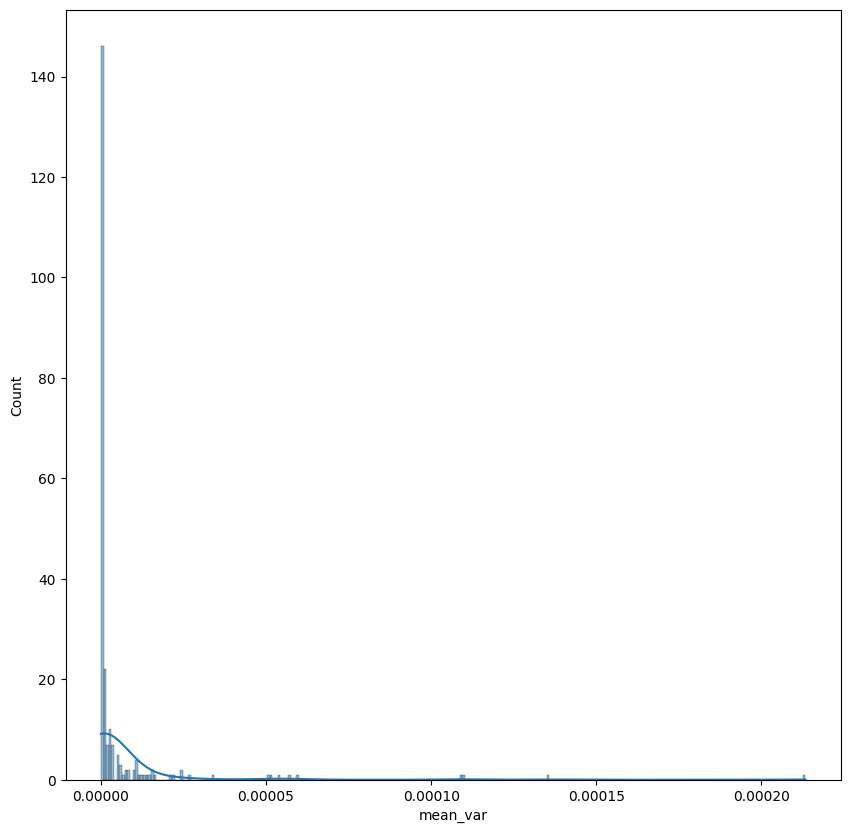

In [196]:
plt.figure(figsize=(10,10))
sns.histplot(corr_df_alert['mean_var'], kde=True)
plt.show()

Variance value related to each location were small, so this data can be the source of truth of coordinate data

# EDA on Jams Dataset

In [6]:
print(df_jam.shape)
print(df_jam.dtypes)

(102322, 13)
time                          object
kemendagri_kabupaten_kode    float64
kemendagri_kabupaten_nama     object
street                        object
level                          int64
median_length                float64
median_delay                 float64
median_speed_kmh             float64
total_records                  int64
id                             int64
date                          object
median_level                 float64
geometry                      object
dtype: object


In [7]:
(df_jam.isna().sum()/df_jam.shape[0]) * 100

time                         0.000000
kemendagri_kabupaten_kode    0.000000
kemendagri_kabupaten_nama    0.000000
street                       1.752311
level                        0.000000
median_length                0.000000
median_delay                 0.000000
median_speed_kmh             0.000000
total_records                0.000000
id                           0.000000
date                         0.000000
median_level                 0.000000
geometry                     0.000000
dtype: float64

In [8]:
df_jam.dropna(inplace=True)
df_jam

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,Pahlawan,2,784.0,62.0,20.310001,4,33469021,2022-07-06,2.0,"MULTILINESTRING ((106.797269 -6.608899, 106.79..."
1,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,Tol Lingkar Luar Bogor,2,1314.0,63.0,37.710000,2,33469023,2022-07-06,2.0,"LINESTRING (106.787027 -6.559782, 106.787701 -..."
2,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),5,167.0,-1.0,0.000000,61,33469019,2022-07-06,5.0,"MULTILINESTRING ((106.800516 -6.561997, 106.80..."
3,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,N8 Jalan Raya Sukabumi,3,379.0,117.5,8.594999,10,33469020,2022-07-06,3.0,"MULTILINESTRING ((106.845486 -6.6594, 106.8454..."
4,2022-07-06 00:00:00.000,32.71,KOTA BOGOR,Tol Lingkar Luar Bogor,1,2438.0,87.0,42.270000,2,33469022,2022-07-06,1.0,"LINESTRING (106.787027 -6.559782, 106.787701 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22953,2022-09-06 00:00:00.000,32.71,KOTA BOGOR,Tol Jagorawi,2,3377.0,116.0,39.030000,1,37279200,2022-09-06,2.0,"LINESTRING (106.831594 -6.604101, 106.831608 -..."
22954,2022-09-06 00:00:00.000,32.71,KOTA BOGOR,N9 Jalan Raya Tajur,1,2625.0,107.5,29.235000,2,37279197,2022-09-06,1.0,"LINESTRING (106.83008 -6.637004, 106.831101 -6..."
22955,2022-09-06 00:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),5,167.0,-1.0,0.000000,60,37279195,2022-09-06,5.0,"MULTILINESTRING ((106.800516 -6.561997, 106.80..."
22956,2022-09-06 00:00:00.000,32.71,KOTA BOGOR,N9 Jalan Raya Pajajaran,2,862.5,77.5,21.035000,4,37279196,2022-09-06,2.0,"MULTILINESTRING ((106.807007 -6.579145, 106.80..."


In [9]:
df_jam[df_jam['level'] != df_jam['median_level']].shape

(0, 13)

Only < 10% rows that have null value, so we can just remove them

In [10]:
df_jam['street'].value_counts()

N9 Raden KH Abdullah bin Nuh    3658
N9 Jalan Raya Pajajaran         3625
N9 Jalan Raya Dramaga           3174
N9 Jalan Raya Tajur             3054
N8 Jalan Raya Bogor             2954
                                ... 
Jagung                             1
Pembangunan 1                      1
Partibi                            1
Garuda 1                           1
Sedap Malam                        1
Name: street, Length: 454, dtype: int64

In [11]:
df_jam['time'] = df_jam['time'].astype('datetime64[ns]')
df_jam

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,2022-07-06,32.71,KOTA BOGOR,Pahlawan,2,784.0,62.0,20.310001,4,33469021,2022-07-06,2.0,"MULTILINESTRING ((106.797269 -6.608899, 106.79..."
1,2022-07-06,32.71,KOTA BOGOR,Tol Lingkar Luar Bogor,2,1314.0,63.0,37.710000,2,33469023,2022-07-06,2.0,"LINESTRING (106.787027 -6.559782, 106.787701 -..."
2,2022-07-06,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),5,167.0,-1.0,0.000000,61,33469019,2022-07-06,5.0,"MULTILINESTRING ((106.800516 -6.561997, 106.80..."
3,2022-07-06,32.71,KOTA BOGOR,N8 Jalan Raya Sukabumi,3,379.0,117.5,8.594999,10,33469020,2022-07-06,3.0,"MULTILINESTRING ((106.845486 -6.6594, 106.8454..."
4,2022-07-06,32.71,KOTA BOGOR,Tol Lingkar Luar Bogor,1,2438.0,87.0,42.270000,2,33469022,2022-07-06,1.0,"LINESTRING (106.787027 -6.559782, 106.787701 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22953,2022-09-06,32.71,KOTA BOGOR,Tol Jagorawi,2,3377.0,116.0,39.030000,1,37279200,2022-09-06,2.0,"LINESTRING (106.831594 -6.604101, 106.831608 -..."
22954,2022-09-06,32.71,KOTA BOGOR,N9 Jalan Raya Tajur,1,2625.0,107.5,29.235000,2,37279197,2022-09-06,1.0,"LINESTRING (106.83008 -6.637004, 106.831101 -6..."
22955,2022-09-06,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),5,167.0,-1.0,0.000000,60,37279195,2022-09-06,5.0,"MULTILINESTRING ((106.800516 -6.561997, 106.80..."
22956,2022-09-06,32.71,KOTA BOGOR,N9 Jalan Raya Pajajaran,2,862.5,77.5,21.035000,4,37279196,2022-09-06,2.0,"MULTILINESTRING ((106.807007 -6.579145, 106.80..."


In [12]:
print("Min Timestamp: {}".format(min(df_jam['time'])))
print("Max Timestamp: {}".format(max(df_jam['time'])))

Min Timestamp: 2022-07-06 00:00:00
Max Timestamp: 2022-09-06 00:00:00


In [13]:
day = (max(df_jam['time']) - min(df_jam['time'])).days
hour = 24
street = len(set(df_jam['street']))

if day * hour * street == df_jam.shape[0]:
    print("Complete historical data")
else:
    print("Incomplete historical data")
    print("Proportion with complete: {}%".format(
        round((df_jam.shape[0]/(day * hour * street)) * 100, 2)
    ))

Incomplete historical data
Proportion with complete: 14.88%


In [14]:
count_group_jam = pd.DataFrame({'count':df_jam.groupby(by=['street', 'time']).size()})
count_group_jam.reset_index(inplace=True)
count_group_jam

,street,time,count
0,AH Nasution,2022-07-09 13:00:00,1
1,AH Nasution,2022-07-19 12:00:00,1
2,AH Nasution,2022-07-19 15:00:00,1
3,AH Nasution,2022-07-22 14:00:00,1
4,AH Nasution,2022-07-22 22:00:00,1
...,...,...,...
51843,Yasmin Raya,2022-08-29 17:00:00,1
51844,Yasmin Raya,2022-08-30 14:00:00,2
51845,Yasmin Raya,2022-09-01 22:00:00,1
51846,Yasmin Raya,2022-09-03 13:00:00,1


In [15]:
non_unique_jam = count_group_jam[count_group_jam['count'] > 1]
non_unique_jam

,street,time,count
5,AH Nasution,2022-07-23 11:00:00,2
16,AH Nasution,2022-08-27 12:00:00,3
18,AH Nasution,2022-08-27 15:00:00,2
22,AH Nasution,2022-08-28 16:00:00,2
31,Achmad Adnawijaya,2022-07-06 17:00:00,2
...,...,...,...
51809,Wijaya Kusuma,2022-09-01 17:00:00,2
51816,Yasmin Raya,2022-07-07 21:00:00,2
51818,Yasmin Raya,2022-07-13 16:00:00,2
51823,Yasmin Raya,2022-07-24 14:00:00,2


In [16]:
unique_jam = count_group_jam[count_group_jam['count'] == 1]
unique_jam

,street,time,count
0,AH Nasution,2022-07-09 13:00:00,1
1,AH Nasution,2022-07-19 12:00:00,1
2,AH Nasution,2022-07-19 15:00:00,1
3,AH Nasution,2022-07-22 14:00:00,1
4,AH Nasution,2022-07-22 22:00:00,1
...,...,...,...
51842,Yasmin Raya,2022-08-28 15:00:00,1
51843,Yasmin Raya,2022-08-29 17:00:00,1
51845,Yasmin Raya,2022-09-01 22:00:00,1
51846,Yasmin Raya,2022-09-03 13:00:00,1


- Several street has more that one row of data at a specific time
  - If there were more that one row, choose the row that has higher report count. If more than one row have equal number of report, choose randomly

In [17]:
# WARNING: Do not run, takes long time (+/- 35 minutes)

cleaned_df_jam = pd.DataFrame(columns=df_jam.columns)

counter = 1

for time, street in zip(count_group_jam['time'], count_group_jam['street']):
    if counter % 10**4 == 0:
        print(counter)
    data = df_jam[
        (df_jam['time'] == time) & \
            (df_jam['street'] == street)
    ]
    if data.shape[0] != 1:
        data.sort_values(by=['total_records'], ascending=False, inplace=True)
    cleaned_df_jam = cleaned_df_jam.append(
        data.iloc[0,:],
        ignore_index=True
    )
    counter += 1

cleaned_df_jam.to_parquet('../data/processed/cleaned_aggregate_jam_{}.parquet.gzip'.format(city),
                    index=False,
                    compression="gzip")



C:\Users\Gibran Brahmanta\AppData\Local\Temp\ipykernel_428\892841777.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cleaned_df_jam = cleaned_df_jam.append(
C:\Users\Gibran Brahmanta\AppData\Local\Temp\ipykernel_428\892841777.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by=['total_records'], ascending=False, inplace=True)


10000
20000
30000
40000
50000


In [19]:
cleaned_df_jam = pd.read_parquet("../data/processed/cleaned_aggregate_jam_Bogor.parquet.gzip")

In [20]:
np.sum(cleaned_df_jam.groupby(by=['time', 'street']).size() > 1)

0

In [21]:
street_count = cleaned_df_jam['street'].value_counts().to_dict()

data = []

day = (max(cleaned_df_jam['time']) - min(cleaned_df_jam['time'])).days
hour = 24
max_row = day * hour

for street in street_count.keys():
    data.append([
        street,
        street_count[street],
        street_count[street]/max_row
    ])

df_completion = pd.DataFrame(data=data, columns=['street', 'count', 'completion_rate'])
df_completion


,street,count,completion_rate
0,KH Soleh Iskandar (Jalur Lambat),1465,0.984543
1,N9 Jalan Raya Pajajaran,1187,0.797715
2,N9 Raden KH Abdullah bin Nuh,1121,0.753360
3,N9 Jalan Raya Tajur,1086,0.729839
4,N9 Jalan Raya Dramaga,1067,0.717070
...,...,...,...
449,Cilebut Residence 2,1,0.000672
450,Majapahit,1,0.000672
451,Purnawarman Raya,1,0.000672
452,Mataram,1,0.000672


In [22]:
df_completion.describe()

,count,completion_rate
count,454.000000,454.000000
mean,114.202643,0.076749
std,253.627533,0.170449
min,1.000000,0.000672
25%,2.000000,0.001344
50%,6.000000,0.004032
75%,57.000000,0.038306
max,1465.000000,0.984543


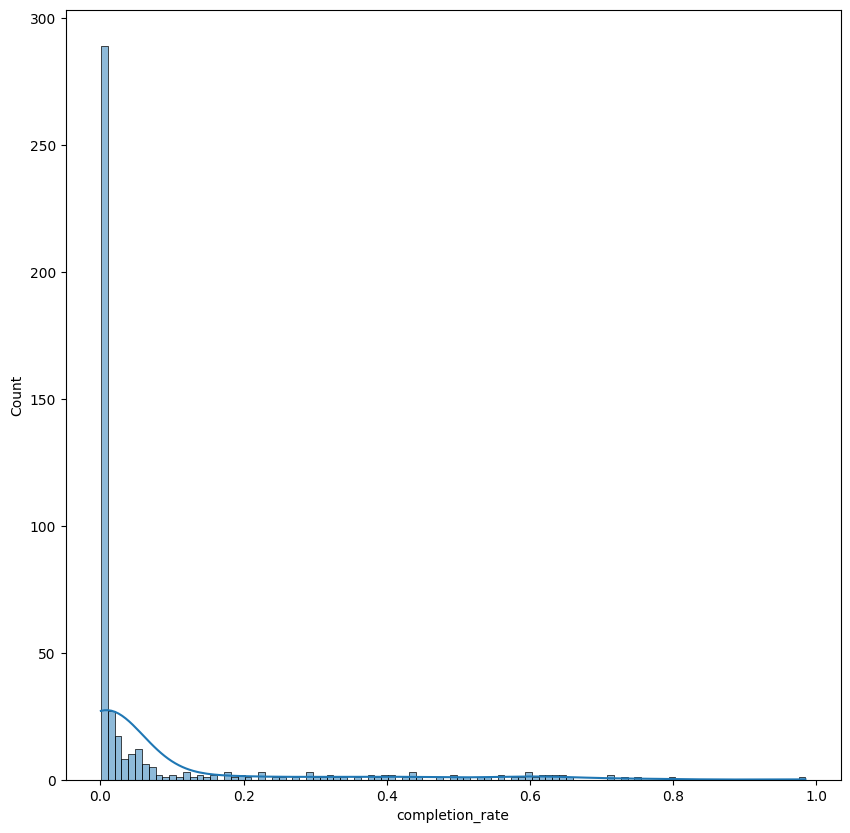

In [23]:
plt.figure(figsize=(10, 10))
sns.histplot(df_completion['completion_rate'], kde=True)
plt.show()

In [24]:
np.quantile(df_completion['completion_rate'], q=[0.75, 0.8, 0.85, 0.9])

array([0.03830645, 0.05725806, 0.14233871, 0.32399194])

In [25]:
thres = np.quantile(df_completion['completion_rate'], q= 0.9)
used_street = list(df_completion[df_completion['completion_rate'] >= thres]['street'])

df_completion[df_completion['street'].isin(used_street)]

,street,count,completion_rate
0,KH Soleh Iskandar (Jalur Lambat),1465,0.984543
1,N9 Jalan Raya Pajajaran,1187,0.797715
2,N9 Raden KH Abdullah bin Nuh,1121,0.753360
3,N9 Jalan Raya Tajur,1086,0.729839
4,N9 Jalan Raya Dramaga,1067,0.717070
5,N8 Jalan Raya Bogor,1062,0.713710
6,Semplak Raya,981,0.659274
7,Brigjen Saptadji Hadi Prawira,957,0.643145
8,Letjen Ibrahim Adjie,956,0.642473
9,Jenderal Sudirman,950,0.638441


In [26]:
used_df_jam = cleaned_df_jam[cleaned_df_jam['street'].isin(used_street)]
used_df_jam.to_parquet('../data/processed/cleaned_aggregate_jam_{}.parquet.gzip'.format(city),
                    index=False,
                    compression="gzip")
used_df_jam

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
27,2022-07-06 12:00:00,32.71,KOTA BOGOR,Achmad Adnawijaya,2,631.0,61.0,16.480000,8,33469485,2022-07-06,2.0,"MULTILINESTRING ((106.816178 -6.587286, 106.81..."
28,2022-07-06 14:00:00,32.71,KOTA BOGOR,Achmad Adnawijaya,2,1022.0,145.5,13.555000,4,33469703,2022-07-06,2.0,"MULTILINESTRING ((106.816697 -6.590787, 106.81..."
29,2022-07-06 15:00:00,32.71,KOTA BOGOR,Achmad Adnawijaya,2,826.0,79.0,16.790000,13,33469826,2022-07-06,2.0,"MULTILINESTRING ((106.816178 -6.587286, 106.81..."
30,2022-07-06 16:00:00,32.71,KOTA BOGOR,Achmad Adnawijaya,2,1022.0,76.0,18.224998,16,33469946,2022-07-06,2.0,"MULTILINESTRING ((106.816439 -6.589038, 106.81..."
31,2022-07-06 17:00:00,32.71,KOTA BOGOR,Achmad Adnawijaya,2,1022.0,95.0,16.630000,19,33470083,2022-07-06,2.0,"MULTILINESTRING ((106.816439 -6.589038, 106.81..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51726,2022-09-04 17:00:00,32.71,KOTA BOGOR,Veteran,2,1027.5,78.5,18.470000,14,37225594,2022-09-04,2.0,"MULTILINESTRING ((106.788193 -6.595608, 106.78..."
51727,2022-09-04 18:00:00,32.71,KOTA BOGOR,Veteran,1,1013.0,61.0,21.780000,15,37225736,2022-09-04,1.0,"MULTILINESTRING ((106.779668 -6.596205, 106.78..."
51728,2022-09-04 19:00:00,32.71,KOTA BOGOR,Veteran,2,511.0,61.5,14.770000,8,37225864,2022-09-04,2.0,"MULTILINESTRING ((106.788193 -6.595608, 106.78..."
51729,2022-09-04 20:00:00,32.71,KOTA BOGOR,Veteran,2,511.0,62.0,14.790000,13,37225972,2022-09-04,2.0,"MULTILINESTRING ((106.788193 -6.595608, 106.78..."


In [174]:
day = (max(used_df_jam['time']) - min(used_df_jam['time'])).days
hour = 24
street = len(set(used_df_jam['street']))

if day * hour * street == used_df_jam.shape[0]:
    print("Complete historical data")
else:
    print("Incomplete historical data")
    print("Proportion with complete: {}%".format(
        round((used_df_jam.shape[0]/(day * hour * street)) * 100, 2)
    ))

Incomplete historical data
Proportion with complete: 54.06%


- Only choose streets that has data count more that 90% percentile on data count distribution. 
  - 90% were choosen without any specific reason, but including too much street will cause an imbalanced dataset that can affects the model performance
  - The objective of creating the model is to prevent traffic, so we can focus on several streets that has high number of traffic jam  

In [175]:
lst_street = set(used_df_jam['street'])

data = []

for street in lst_street:
    used_data = used_df_jam[used_df_jam['street'] == street].loc[:,['median_speed_kmh', 'median_length', 'median_delay']].corr()
    corr_length = used_data.iloc[0,1]
    corr_delay = used_data.iloc[0,2]
    data.append([
        street,
        corr_length,
        corr_delay
    ])

corr_df = pd.DataFrame(data=data, columns=['street', 'corr_length', 'corr_delay'])
corr_df.describe()

,corr_length,corr_delay
count,46.000000,46.000000
mean,0.566587,-0.637149
std,0.227217,0.237410
min,-0.007248,-0.900261
25%,0.465960,-0.734581
50%,0.606928,-0.653987
75%,0.742801,-0.579282
max,0.912002,0.701499


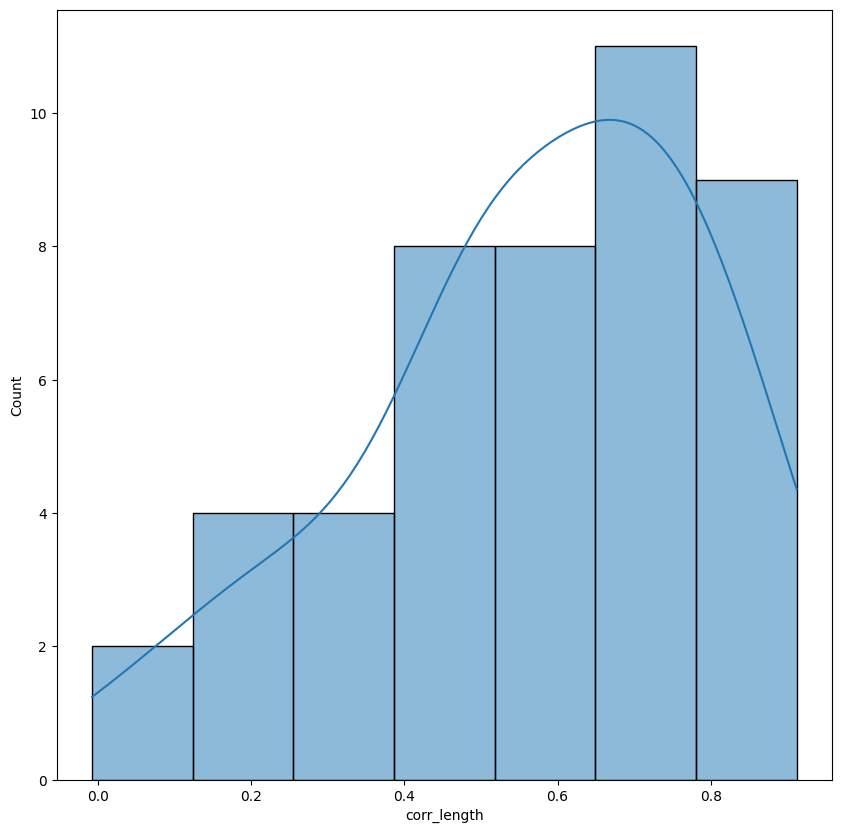

In [176]:
plt.figure(figsize=(10,10))
sns.histplot(corr_df['corr_length'], kde=True)
plt.show()

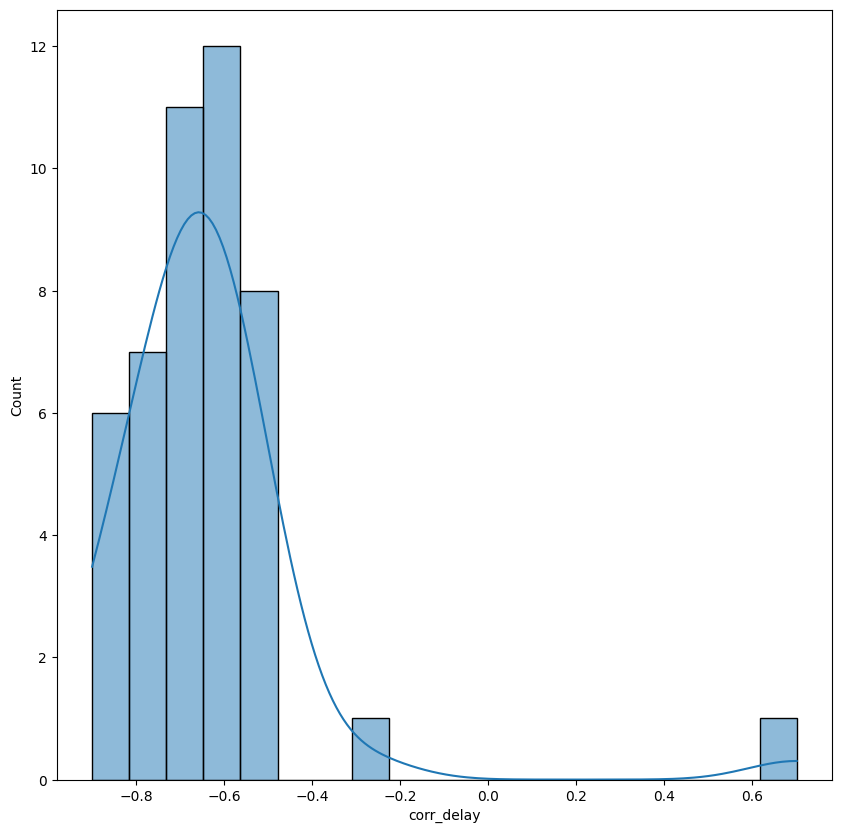

In [177]:
plt.figure(figsize=(10,10))
sns.histplot(corr_df['corr_delay'], kde=True)
plt.show()

- There were correlations between speed and length, also between delay and speed
- To complete the dataset, for each timestamp that doesn't exist in a street data, do
  - Assume that the jam level were 0
  - 'median_speed_kmh': compute using the comparison between free flow speed and speed on a jammed street
  - 'median_length': compute using the comparison between the length and speed
  - 'median_delay': compute using the comparison between the delay and speed
  - Those step will be conducted on data preparation phase

In [14]:
pattern = '(-?(\d+\.?\d+)\s-?(\d+\.?\d+))'

def get_loc_data(row, pattern):
    street = row['street']
    lst_data = [data[0] for data in re.findall(pattern, row['geometry'])]
    reformatted_data = np.array([np.array(data.split(" ")).astype(float) for data in lst_data])
    mean_long = np.mean(reformatted_data[:,0])
    mean_lat = np.mean(reformatted_data[:,1])
    var_long = np.var(reformatted_data[:,0])
    var_lat = np.var(reformatted_data[:,1])
    return street, mean_long, mean_lat, var_long, var_lat

In [181]:
data = []

for i in range(used_df_jam.shape[0]):
    if i % 10**4 == 0:
        print(i)
    row = used_df_jam.iloc[i,:]
    street, mean_long, mean_lat, var_long, var_lat = get_loc_data(row, pattern)
    data.append([
        street, 
        mean_long, 
        mean_lat, 
        var_long, 
        var_lat 
    ])

df_jam_corr = pd.DataFrame(data=data, columns=['street', 'mean_long', 'mean_lat', 'var_long', 'var_lat'])

df_jam_corr.to_parquet('../data/misc/jam_corr.parquet.gzip',
                    index=False,
                    compression="gzip")
    

0
10000
20000
30000


In [182]:
df_jam_corr = pd.read_parquet("../data/misc/jam_corr.parquet.gzip")
df_jam_corr

,street,mean_long,mean_lat,var_long,var_lat
0,Achmad Adnawijaya,106.816824,-6.585023,3.573132e-07,2.808468e-06
1,Achmad Adnawijaya,106.816777,-6.585763,3.174084e-07,5.508835e-06
2,Achmad Adnawijaya,106.816759,-6.585560,3.293140e-07,4.085696e-06
3,Achmad Adnawijaya,106.816770,-6.585713,3.204238e-07,5.093992e-06
4,Achmad Adnawijaya,106.816771,-6.585721,3.199548e-07,5.159821e-06
...,...,...,...,...,...
36996,Veteran,106.783685,-6.595181,4.925861e-06,3.945693e-07
36997,Veteran,106.783502,-6.595264,5.684477e-06,4.472286e-07
36998,Veteran,106.786032,-6.595416,2.846802e-06,4.477852e-08
36999,Veteran,106.785366,-6.595389,4.861350e-06,1.461065e-07


In [205]:
grouped_df_jam_corr = df_jam_corr.groupby(by=['street']).mean()
grouped_df_jam_corr['mean_var'] = [
    np.mean([grouped_df_jam_corr.iloc[i,:]['var_long'], grouped_df_jam_corr.iloc[i,:]['var_lat']]) for i in range(grouped_df_jam_corr.shape[0])
]
grouped_df_jam_corr.reset_index(inplace=True)
grouped_df_jam_corr.rename(columns={'index': 'street'}, inplace=True)
grouped_df_jam_corr.describe()

,mean_long,mean_lat,var_long,var_lat,mean_var
count,46.000000,46.000000,4.600000e+01,4.600000e+01,4.600000e+01
mean,106.795465,-6.587558,8.040143e-06,1.182446e-05,9.932302e-06
std,0.022060,0.027023,1.345957e-05,1.976435e-05,1.384753e-05
min,106.741099,-6.663127,1.192194e-08,2.885991e-08,2.441408e-07
25%,106.783576,-6.602141,4.093380e-07,1.561889e-06,2.350624e-06
50%,106.796979,-6.586828,3.607304e-06,5.514204e-06,5.282481e-06
75%,106.808428,-6.567061,7.919897e-06,1.253747e-05,1.017453e-05
max,106.850726,-6.549396,6.038437e-05,1.163747e-04,6.330582e-05


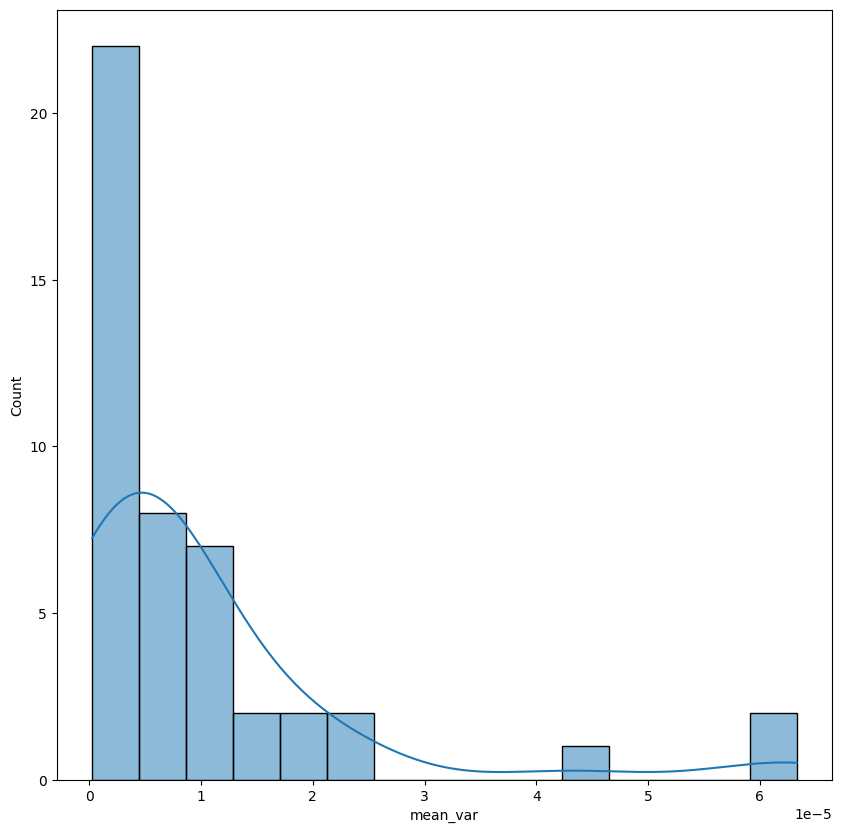

In [197]:
plt.figure(figsize=(10,10))
sns.histplot(grouped_df_jam_corr['mean_var'], kde=True)
plt.show()

Variance value related to each location were small, so this data can be the source of truth of coordinate data

# EDA on Irregularities Dataset

In [6]:
df_irregularities.dtypes

time                          object
kemendagri_kabupaten_kode    float64
kemendagri_kabupaten_nama     object
street                        object
jam_level                      int64
median_length                float64
median_delay_seconds         float64
median_regular_speed         float64
total_records                  int64
cause_type                   float64
median_seconds               float64
median_speed                 float64
date                          object
median_jam_level             float64
id                             int64
geometry                      object
dtype: object

In [85]:
(df_irregularities.isna().sum()/df_irregularities.shape[0]) * 100

time                           0.0
kemendagri_kabupaten_kode      0.0
kemendagri_kabupaten_nama      0.0
street                         0.0
jam_level                      0.0
median_length                  0.0
median_delay_seconds           0.0
median_regular_speed           0.0
total_records                  0.0
cause_type                   100.0
median_seconds                 0.0
median_speed                   0.0
date                           0.0
median_jam_level               0.0
id                             0.0
geometry                       0.0
dtype: float64

In [25]:
df_irregularities[df_irregularities['jam_level'] != df_irregularities['median_jam_level']]

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,cause_type,median_seconds,median_speed,date,median_jam_level,id,geometry


- 'median_jam_level' was useless because for all of the data, it has exactly same value with 'jam_level'
- 'cause_type' was useless because for all of the data, it has null value

In [86]:
df_irregularities['time'] = df_irregularities['time'].astype("datetime64[ns]")
df_irregularities

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,cause_type,median_seconds,median_speed,date,median_jam_level,id,geometry
0,2022-07-06 09:00:00,32.71,KOTA BOGOR,N9 Jalan Raya Dramaga,4,1878.0,689.0,13.775000,18,NaN,856.5,7.340,2022-07-06,4.0,1492793,"MULTILINESTRING ((106.738284 -6.568848, 106.73..."
1,2022-07-06 09:00:00,32.71,KOTA BOGOR,N9 Jalan Raya Dramaga,3,1226.0,339.5,14.400000,6,NaN,447.0,9.995,2022-07-06,3.0,1492792,"MULTILINESTRING ((106.73546 -6.565547, 106.735..."
2,2022-07-06 10:00:00,32.71,KOTA BOGOR,Kapten Yusuf,3,1399.0,517.0,18.150000,2,NaN,707.0,7.110,2022-07-06,3.0,1492794,"LINESTRING (106.785538 -6.61574, 106.785797 -6..."
3,2022-07-06 10:00:00,32.71,KOTA BOGOR,N9 Underpass KH Soleh Iskandar,4,627.0,525.0,23.900002,20,NaN,573.5,3.930,2022-07-06,4.0,1492797,"MULTILINESTRING ((106.800519 -6.562005, 106.80..."
4,2022-07-06 10:00:00,32.71,KOTA BOGOR,N9 Jalan Raya Dramaga,4,1420.0,623.0,11.710000,19,NaN,734.0,6.560,2022-07-06,4.0,1492796,"MULTILINESTRING ((106.739572 -6.570715, 106.73..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,2022-09-04 19:00:00,32.71,KOTA BOGOR,N9 Jalan Raya Ciawi,4,796.0,1878.0,12.700000,6,NaN,1967.0,1.450,2022-09-04,4.0,1583280,"MULTILINESTRING ((106.847295 -6.65567, 106.847..."
4047,2022-09-04 19:00:00,32.71,KOTA BOGOR,N9 Jalan Raya Dramaga,4,1418.0,835.0,9.400000,1,NaN,966.0,5.280,2022-09-04,4.0,1583281,"LINESTRING (106.737974 -6.568384, 106.737162 -..."
4048,2022-09-04 19:00:00,32.71,KOTA BOGOR,Kapten Yusuf,3,1784.0,725.0,12.330000,23,NaN,980.0,6.550,2022-09-04,3.0,1583277,"MULTILINESTRING ((106.783669 -6.618487, 106.78..."
4049,2022-09-04 20:00:00,32.71,KOTA BOGOR,N9 Jalan Raya Dramaga,4,1289.0,892.0,8.440000,5,NaN,1010.0,4.590,2022-09-04,4.0,1583285,"MULTILINESTRING ((106.739572 -6.570715, 106.73..."


In [27]:
print("Min Timestamp: {}".format(min(df_irregularities['time'])))
print("Max Timestamp: {}".format(max(df_irregularities['time'])))

Min Timestamp: 2022-07-06 09:00:00.000
Max Timestamp: 2022-09-04 21:00:00.000


In [87]:
df_irregularities['street'].value_counts()

N9 Jalan Raya Dramaga           768
N9 Jalan Raya Tajur             296
Semplak Raya                    253
Kapten Yusuf                    215
N9 Raden KH Abdullah bin Nuh    210
                               ... 
Mandala Raya                      1
Babakan Dramaga                   1
Subur                             1
Baranangsiang Indah               1
Bukit Cimanggu City Raya          1
Name: street, Length: 85, dtype: int64

In [89]:
day = (max(df_irregularities['time']) - min(df_irregularities['time'])).days
hour = 24
street = len(set(df_irregularities['street']))

if day * hour * street == df_irregularities.shape[0]:
    print("Complete historical data")
else:
    print("Incomplete historical data")

Incomplete historical data


In [9]:
count_group_irregularities = pd.DataFrame({'count':df_irregularities.groupby(by=['street', 'time']).size()})
count_group_irregularities.reset_index(inplace=True)
count_group_irregularities

,street,time,count
0,Achmad Adnawijaya,2022-07-16 15:00:00.000,1
1,Achmad Adnawijaya,2022-08-04 10:00:00.000,2
2,Achmad Adnawijaya,2022-08-04 11:00:00.000,2
3,Achmad Adnawijaya,2022-08-11 18:00:00.000,1
4,Achmad Adnawijaya,2022-08-11 19:00:00.000,1
...,...,...,...
2616,Veteran,2022-08-30 07:00:00.000,1
2617,Veteran,2022-09-02 16:00:00.000,1
2618,Veteran,2022-09-03 16:00:00.000,1
2619,Veteran,2022-09-03 17:00:00.000,1


In [12]:
cleaned_df_irregularities = pd.DataFrame(columns=df_irregularities.columns)

counter = 1

for time, street in zip(count_group_irregularities['time'], count_group_irregularities['street']):
    if counter % (5*100) == 0:
        print(counter)
    data = df_irregularities[
        (df_irregularities['time'] == time) & \
            (df_irregularities['street'] == street)
    ]
    if data.shape[0] != 1:
        data.sort_values(by=['total_records'], ascending=False, inplace=True)
    cleaned_df_irregularities = cleaned_df_irregularities.append(
        data.iloc[0,:],
        ignore_index=True
    )
    counter += 1

cleaned_df_irregularities.to_parquet('../data/processed/cleaned_aggregate_irregularities_{}.parquet.gzip'.format(city),
                    index=False,
                    compression="gzip")

C:\Users\Gibran Brahmanta\AppData\Local\Temp\ipykernel_8000\478806531.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cleaned_df_irregularities = cleaned_df_irregularities.append(
C:\Users\Gibran Brahmanta\AppData\Local\Temp\ipykernel_8000\478806531.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by=['total_records'], ascending=False, inplace=True)


500
1000
1500
2000
2500


In [17]:
data = []

for i in range(cleaned_df_irregularities.shape[0]):
    if i % 10**3 == 0:
        print(i)
    row = cleaned_df_irregularities.iloc[i,:]
    street, mean_long, mean_lat, var_long, var_lat = get_loc_data(row, pattern)
    data.append([
        street, 
        mean_long, 
        mean_lat, 
        var_long, 
        var_lat 
    ])

df_irregularities_corr = pd.DataFrame(data=data, columns=['street', 'mean_long', 'mean_lat', 'var_long', 'var_lat'])
df_irregularities_corr

0
1000
2000


,street,mean_long,mean_lat,var_long,var_lat
0,Achmad Adnawijaya,106.816777,-6.585763,3.174084e-07,5.508835e-06
1,Achmad Adnawijaya,106.816690,-6.585886,2.638155e-07,3.871674e-06
2,Achmad Adnawijaya,106.816887,-6.585094,3.273129e-07,4.051141e-06
3,Achmad Adnawijaya,106.816370,-6.587240,5.614686e-08,3.242104e-06
4,Achmad Adnawijaya,106.816403,-6.587076,6.577955e-08,3.360080e-06
...,...,...,...,...,...
2616,Veteran,106.783787,-6.595181,5.434007e-06,4.059790e-07
2617,Veteran,106.783057,-6.595297,4.483562e-06,4.480608e-07
2618,Veteran,106.782449,-6.595262,2.120267e-06,5.054152e-07
2619,Veteran,106.783095,-6.595300,4.520297e-06,4.424344e-07


In [18]:
grouped_df_irregularities_corr = df_irregularities_corr.groupby(by=['street']).mean()
grouped_df_irregularities_corr['mean_var'] = [
    np.mean([grouped_df_irregularities_corr.iloc[i,:]['var_long'], grouped_df_irregularities_corr.iloc[i,:]['var_lat']]) \
    for i in range(grouped_df_irregularities_corr.shape[0])
]
grouped_df_irregularities_corr.reset_index(inplace=True)
grouped_df_irregularities_corr.rename(columns={'index': 'street'}, inplace=True)
grouped_df_irregularities_corr.describe()

,mean_long,mean_lat,var_long,var_lat,mean_var
count,85.000000,85.000000,8.500000e+01,8.500000e+01,8.500000e+01
mean,106.796744,-6.587561,4.990424e-06,7.243037e-06,6.116730e-06
std,0.025107,0.030105,9.851795e-06,1.447741e-05,1.009377e-05
min,106.733126,-6.675914,8.668605e-09,2.326779e-09,4.618180e-07
25%,106.782693,-6.602970,4.916814e-07,1.106458e-06,1.598522e-06
50%,106.800270,-6.587514,2.408771e-06,2.585711e-06,2.504644e-06
75%,106.812842,-6.566538,4.672383e-06,8.127047e-06,6.352557e-06
max,106.851030,-6.522278,7.647647e-05,1.060212e-04,6.118287e-05


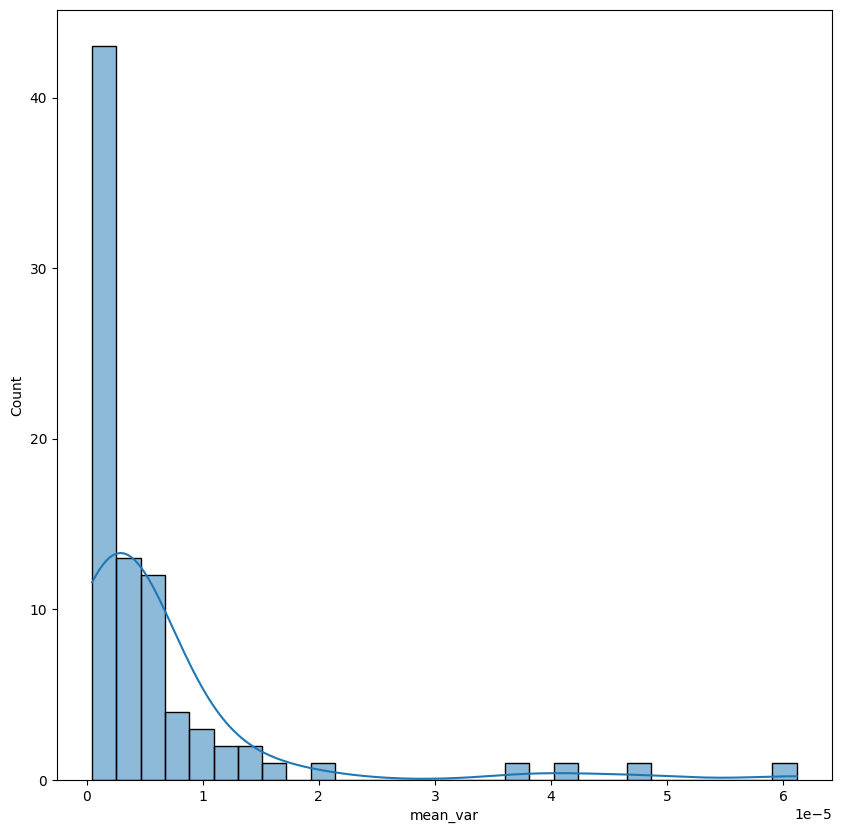

In [19]:
plt.figure(figsize=(10,10))
sns.histplot(grouped_df_irregularities_corr['mean_var'], kde=True)
plt.show()

Variance value related to each location were small, so this data can be the source of truth of coordinate data

# Comparasion between Dataset

In [221]:
filtered_corr_df_alert = corr_df_alert[corr_df_alert['street'].isin(list(grouped_df_jam_corr['street']))]
filtered_corr_df_alert.shape

(46, 6)

In [219]:
filtered_corr_df_irregularities = grouped_df_irregularities_corr[grouped_df_irregularities_corr['street'].isin(list(grouped_df_jam_corr['street']))]
filtered_corr_df_irregularities.shape

(43, 6)

In [208]:
df_corr_joined = pd.merge(
    filtered_corr_df_alert, grouped_df_jam_corr,
    on=['street'],
    suffixes=('_alert', '_jam')
)

df_corr_joined

,street,mean_long_alert,mean_lat_alert,var_long_alert,var_lat_alert,mean_var_alert,mean_long_jam,mean_lat_jam,var_long_jam,var_lat_jam,mean_var_jam
0,N8 Jalan Raya Bogor,106.820827,-6.550839,2.604736e-05,4.191674e-05,3.398205e-05,106.817621,-6.554792,1.846712e-05,2.720674e-05,2.283693e-05
1,Tumenggung Wiradireja,106.823320,-6.589475,1.596368e-05,3.244492e-07,8.144066e-06,106.825111,-6.589429,5.851689e-06,1.013322e-07,2.976511e-06
2,N9 Ir Haji Juanda,106.795545,-6.598654,2.110968e-06,1.382134e-05,7.966155e-06,106.795587,-6.599591,2.327924e-06,1.343270e-05,7.880311e-06
3,N9 Cifor,106.755362,-6.569465,1.412274e-07,1.414774e-07,1.413524e-07,106.755240,-6.569344,3.881206e-07,3.884483e-07,3.882845e-07
4,N9 Raden KH Abdullah bin Nuh,106.763634,-6.564383,3.197033e-05,1.625417e-05,2.411225e-05,106.767532,-6.561285,2.663492e-05,1.236290e-05,1.949891e-05
5,Tol Lingkar Luar Bogor,106.801979,-6.561359,2.501651e-04,2.132601e-05,1.357456e-04,106.787443,-6.554525,5.708314e-05,2.902840e-05,4.305577e-05
6,KH Soleh Iskandar (Jalur Lambat),106.800426,-6.561983,1.623194e-06,8.644533e-08,8.548195e-07,106.801079,-6.561827,4.594218e-07,2.885991e-08,2.441408e-07
7,Kapten Yusuf,106.787399,-6.614419,1.016668e-05,1.292062e-05,1.154365e-05,106.787690,-6.614472,8.060161e-06,1.065547e-05,9.357816e-06
8,Surya Kencana,106.801202,-6.606267,3.829892e-06,5.770785e-06,4.800339e-06,106.801180,-6.606205,3.439705e-06,4.920184e-06,4.179945e-06
9,Cilebut Raya,106.799401,-6.548865,1.551273e-07,1.609243e-05,8.123776e-06,106.799611,-6.549396,2.814504e-07,1.477661e-05,7.529028e-06


In [213]:
df_corr_joined['diff_lat'] = df_corr_joined['mean_lat_alert'] - df_corr_joined['mean_lat_jam']
df_corr_joined['diff_long'] = df_corr_joined['mean_long_alert'] - df_corr_joined['mean_long_jam']

used_df_corr_joined = df_corr_joined.loc[:,['street', 'diff_long', 'diff_lat']]
used_df_corr_joined.describe()

,diff_long,diff_lat
count,46.000000,46.000000
mean,0.000053,0.000100
std,0.002647,0.002411
min,-0.004963,-0.006834
25%,-0.000626,-0.000371
50%,-0.000027,0.000042
75%,0.000457,0.000957
max,0.014536,0.008221


- Related to the coordinates,
  - Irregularities dataset couldn't be used because there were several street that were being used doesn't appear
  - Alert dataset can be used, but the variance were higher if compared to jam dataset
    - So jam dataset were used as the source of truth of coordinates on each used street

In [223]:
jam_irregularities_joined = pd.merge(
    used_df_jam, df_irregularities,
    on=['time', 'street'],
    suffixes=('_jam', '_irregularities')
)
jam_irregularities_joined

,time,kemendagri_kabupaten_kode_jam,kemendagri_kabupaten_nama_jam,street,level,median_length_jam,median_delay,median_speed_kmh,total_records_jam,id_jam,...,median_delay_seconds,median_regular_speed,total_records_irregularities,cause_type,median_seconds,median_speed,date_irregularities,median_jam_level,id_irregularities,geometry_irregularities
0,2022-07-16 15:00:00,32.71,KOTA BOGOR,Achmad Adnawijaya,3,1022.0,166.0,12.57,31,34104966,...,791.0,13.84,5,NaN,917.0,4.010,2022-07-16,4.0,1510738,"MULTILINESTRING ((106.816697 -6.590787, 106.81..."
1,2022-08-04 10:00:00,32.71,KOTA BOGOR,Achmad Adnawijaya,4,671.0,491.0,3.63,25,35329137,...,595.0,24.70,15,NaN,670.0,4.260,2022-08-04,4.0,1540574,"MULTILINESTRING ((106.816439 -6.589038, 106.81..."
2,2022-08-04 10:00:00,32.71,KOTA BOGOR,Achmad Adnawijaya,4,671.0,491.0,3.63,25,35329137,...,475.5,20.23,2,NaN,596.5,6.155,2022-08-04,3.0,1540573,"LINESTRING (106.816697 -6.590787, 106.816331 -..."
3,2022-08-04 11:00:00,32.71,KOTA BOGOR,Achmad Adnawijaya,4,354.0,296.5,5.07,22,35329239,...,472.0,20.23,4,NaN,593.5,6.190,2022-08-04,3.0,1540576,"MULTILINESTRING ((106.816697 -6.590787, 106.81..."
4,2022-08-04 11:00:00,32.71,KOTA BOGOR,Achmad Adnawijaya,4,354.0,296.5,5.07,22,35329239,...,450.5,18.74,8,NaN,522.0,3.980,2022-08-04,4.0,1540577,"MULTILINESTRING ((106.816172 -6.58628, 106.816..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3502,2022-09-02 16:00:00,32.71,KOTA BOGOR,Veteran,4,368.0,254.0,4.27,45,37073012,...,559.5,24.04,14,NaN,685.5,4.455,2022-09-02,4.0,1578052,"MULTILINESTRING ((106.784991 -6.595436, 106.78..."
3503,2022-09-03 16:00:00,32.71,KOTA BOGOR,Veteran,4,368.0,371.0,4.01,37,37148701,...,516.0,21.85,13,NaN,586.0,4.400,2022-09-03,4.0,1580511,"MULTILINESTRING ((106.783656 -6.594964, 106.78..."
3504,2022-09-03 17:00:00,32.71,KOTA BOGOR,Veteran,4,789.0,516.0,4.57,39,37148899,...,541.0,21.79,28,NaN,637.5,4.670,2022-09-03,4.0,1580530,"MULTILINESTRING ((106.788193 -6.595608, 106.78..."
3505,2022-09-04 14:00:00,32.71,KOTA BOGOR,Veteran,4,449.0,341.0,4.77,19,37225155,...,455.0,23.27,8,NaN,542.0,5.555,2022-09-04,4.0,1583239,"MULTILINESTRING ((106.779668 -6.596205, 106.78..."


In [227]:
used_jam_irregularities_joined = jam_irregularities_joined.loc[:, ['time', 
    'street', 
    'level', 
    'median_jam_level', 
    'median_speed_kmh', 
    'median_speed']]
used_jam_irregularities_joined['level_gap'] = used_jam_irregularities_joined['level'] - used_jam_irregularities_joined['median_jam_level']
used_jam_irregularities_joined['speed_gap'] = used_jam_irregularities_joined['median_speed_kmh'] - used_jam_irregularities_joined['median_speed']
used_jam_irregularities_joined.loc[:,['level_gap', 'speed_gap']].describe()

,level_gap,speed_gap
count,3507.000000,3507.000000
mean,-0.443114,3.353238
std,0.928628,6.311391
min,-3.000000,-25.325000
25%,-1.000000,-0.087500
50%,0.000000,1.925000
75%,0.000000,6.527500
max,2.000000,48.130000


There were differences between several attributes that appear on irregularities and jam dataset. But, since the objective were to prevent jam, so the data on jam dataset will be used